In [26]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

In [3]:
df = pd.read_csv(r"C:\Users\ruben\OneDrive\Desktop\Loan approvval\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [48]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include="object").columns

for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

# perform WoE encoding for person_home_ownership, loan_intent, loan_grade
# perform binary mapping for cb_person_default_on_file

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file: ['Y' 'N']


In [6]:
df[df["person_emp_length"].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


<Axes: xlabel='loan_int_rate', ylabel='Count'>

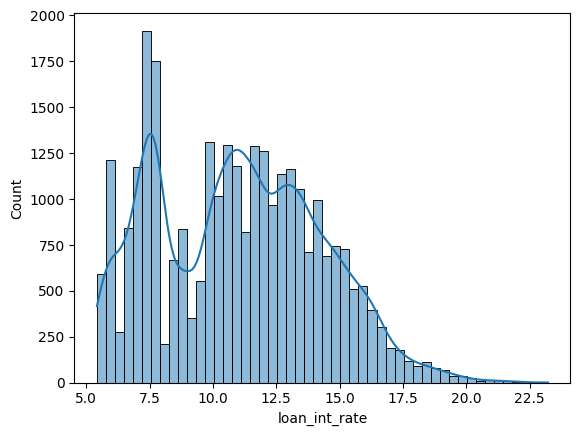

In [17]:
df[df["loan_int_rate"].isna()]
sns.histplot(df["loan_int_rate"], kde=True, bins=50)

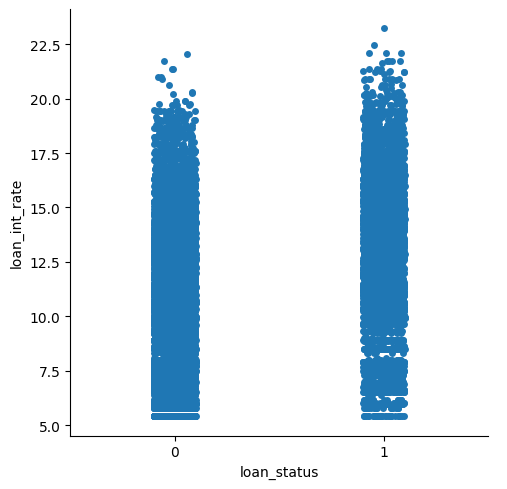

In [18]:
sns.catplot(data=df, x="loan_status", y="loan_int_rate")

In [25]:
df.groupby("loan_status")["loan_int_rate"].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
loan_status,,,,
0,5.42,10.435999,10.59,22.06
1,5.42,13.060207,13.49,23.22


Levene's test: statistic = 66.9625, p-value = 0.0000
T-test: t-statistic = -57.7566, p-value = 0.0000
Mann-Whitney U test: U-statistic = 41146343.5000, p-value = 0.0000


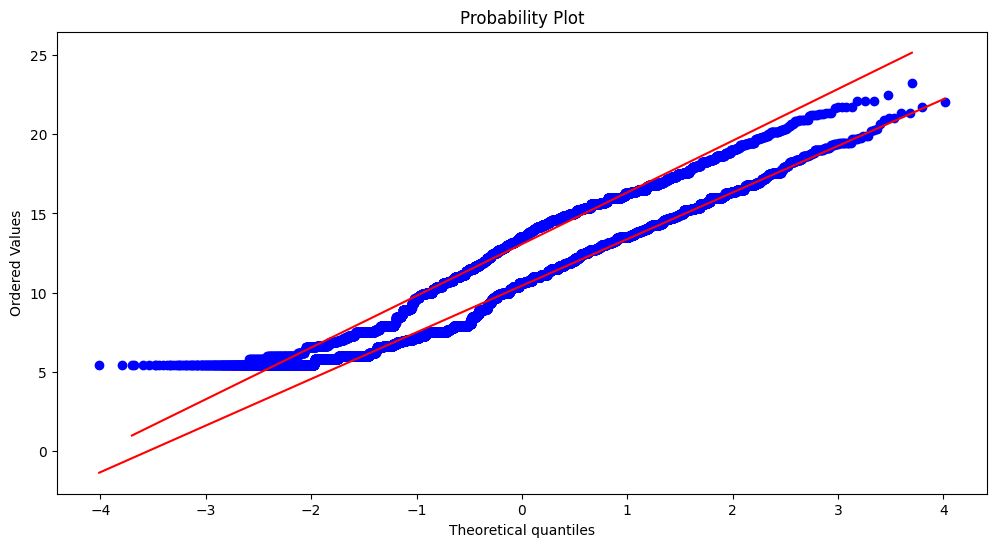

In [29]:
import pandas as pd
from scipy.stats import ttest_ind, levene, mannwhitneyu
import matplotlib.pyplot as plt
import scipy.stats as stats

# Drop NaN values
group_0 = df[df["loan_status"] == 0]["loan_int_rate"].dropna()
group_1 = df[df["loan_status"] == 1]["loan_int_rate"].dropna()

# Visualize normality (optional for large datasets)
plt.figure(figsize=(12, 6))
stats.probplot(group_0, dist="norm", plot=plt)
stats.probplot(group_1, dist="norm", plot=plt)

# Check equal variance
stat, p_value_var = levene(group_0, group_1)
print(f"Levene's test: statistic = {stat:.4f}, p-value = {p_value_var:.4f}")

# Perform t-test or Mann-Whitney U test
if p_value_var > 0.05:  # Equal variances
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=True)
else:  # Unequal variances (Welch's t-test)
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Non-parametric test if necessary
if p_value < 0.05:  # If t-test shows significance
    u_stat, p_value_mwu = mannwhitneyu(group_0, group_1)
    print(f"Mann-Whitney U test: U-statistic = {u_stat:.4f}, p-value = {p_value_mwu:.4f}")
